# Manipulação Eficiente de Dados

#### Usando pipes para simplificar seu código

> Arquivo
>
> Os arquivos que você precisa para concluir este tutorial podem ser baixados aqui: https://github.com/ourcodingclub/CC-data-manip-2

## **1. Uma introdução aos pipes**

O operador de pipe é uma coisinha engraçada que serve de canal para que a saída de um comando seja passada para outra função de forma integrada, ou seja, sem criar objetos intermediários. Ele realmente faz seu código fluir e evita a repetição.

In [2]:
# Pacotes
library(dplyr) # para manipulação de dados
library(ggplot2)  # para fazer gráficos; certifique-se de tê-lo instalado ou instale-o agora

# Carregando dados
trees <- read.csv("trees.csv", header = TRUE)

# Certifique-se de que os dados importados estão OK, familiarize-se com as variáveis
head(trees)

,Site,LatinName,CommonName,Height,Spread,AgeGroup,DiameterAt,Easting,Northing
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328092,671054
2,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328099,671061
3,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328106,671067
4,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328109,671071
5,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328127,671089
6,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328131,671093


Digamos que queremos saber quantas árvores de cada espécie são encontradas no conjunto de dados.

In [6]:
# Conte o número de árvores de cada espécie

# Crie uma estrutura de agrupamento interna, para que a próxima função atue nos grupos (aqui, espécies) separadamente.
trees.grouped <- group_by(trees, CommonName)

# Aqui usamos length para contar o número de linhas (árvores) para cada grupo (espécie). Poderíamos ter usado qualquer nome de linha.
trees.summary <- summarise(trees.grouped, count = length(CommonName))

# Alternativamente, o dplyr tem uma função de contagem que faz a contagem para você!
trees.summary <- tally(trees.grouped)

# Observando o resultado
trees.summary

CommonName,n
<chr>,<int>
Aspen,3
Balsam Poplar,6
Birch spp,2
Cherry spp,7
Chestnut spp,2
Common Alder,1
Common Ash,59
Common Beech,15
Common Elder,8


Isso funciona bem, mas observe como tivemos que criar um quadro de dados extra, , antes de alcançar nossa saída desejada. Para uma análise maior e complexa, isso rapidamente bagunçaria seu ambiente com muitos objetos que você realmente não precisa! É aqui que entra o pipe para salvar o dia.

In [9]:
# Conte o número de árvores de cada espécie, com um pipe!

trees.summary2 <- trees %>% # O objeto do data frame que será passado no pipe
  group_by(CommonName) %>% # Viu como não precisamos nomear o objeto, apenas a variável de agrupamento?
  tally() # E não precisamos de nada aqui, já passou pelo pipe!

trees.summary2

CommonName,n
<chr>,<int>
Aspen,3
Balsam Poplar,6
Birch spp,2
Cherry spp,7
Chestnut spp,2
Common Alder,1
Common Ash,59
Common Beech,15
Common Elder,8


### **Observações importantes:**

>  Os pipes só funcionam em objetos de quadro de dados, e as funções fora do tidyverse geralmente exigem que você especifique a fonte de dados com um ponto de parada completa. Mas, como veremos mais adiante, você ainda pode fazer coisas avançadas, mantendo essas limitações em mente!

Vamos usar mais algumas das nossas funções favoritas em correntes de pipes.

In [10]:
trees.subset <- trees %>%
  filter(CommonName %in% c('Common Ash', 'Rowan', 'Scots Pine')) %>%
  group_by(CommonName, AgeGroup) %>%
  tally()

trees.subset

CommonName,AgeGroup,n
<chr>,<chr>,<int>
Common Ash,Juvenile,4
Common Ash,Mature,2
Common Ash,Middle Aged,36
Common Ash,Semi-mature,17
Rowan,Juvenile,7
Scots Pine,Mature,2
Scots Pine,Middle Aged,3


Aqui estamos primeiro subdefinindo o quadro de dados para apenas três espécies, e contando o número de árvores para cada espécie, mas também dividindo-as por faixa etária. Os nomes intuitivos das ações do tornam o código muito legível para seus colegas também.

## **2. Mais funções de dplyr**

O **summarise_all()**, você pode ter adivinhado, ele executará uma função de resumo de sua escolha sobre TODAS as colunas. Não é significativo aqui, mas poderia ser se todos os valores fossem numéricos.

### **summarise_all() - Gerar rapidamente um dataframe de resumo**

In [11]:
sum.all <- summarise_all(trees, mean)

sum.all

Warning message:
“There were 7 warnings in `summarise()`.
The first warning was:
ℹ In argument: `Site = (function (x, ...) ...`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 6 remaining warnings.”


Site,LatinName,CommonName,Height,Spread,AgeGroup,DiameterAt,Easting,Northing
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA,NA,328453.4,670745.6


Como apenas duas das colunas tinham valores numéricos sobre os quais uma média poderia ser calculada, as outras colunas têm valores ausentes.

Agora vamos passar para uma função verdadeiramente emocionante que muitas pessoas não conhecem.

### **case_when() - Um favorito para reclassificar valores ou fatores**

Mas primeiro, parece má forma de introduzir esta função sem também introduzir a função mais simples sobre a qual ela constrói, **ifelse()**. Você dá uma instrução condicional que ela avaliará e os valores que ela deve retornar quando essa declaração for verdadeira ou falsa.

In [12]:
# Exemplo simples

vec <- c(4, 13, 15, 6) # Cria um vetor para avaliar

ifelse(vec < 10, "A", "B") # Forneça as condições: se for inferior a 10, retorne A, caso contrário, retorne B

[1] "A" "B" "B" "A"

O super useful é uma generalização que permite atribuir mais de dois resultados. Todos os operadores lógicos estão disponíveis e você atribui o novo valor com um til:

In [13]:
vec2 <- c("What am I?", "A", "B", "C", "D")

case_when(vec2 == "What am I?" ~ "I am the walrus",
          vec2 %in% c("A", "B") ~ "goo",
          vec2 == "C" ~ "ga",
          vec2 == "D" ~ "joob")

[1] "I am the walrus" "goo"             "goo"             "ga"             
[5] "joob"

Mas chega de demonstrações, e vamos ver como podemos usar essas funções na vida real para reclassificar nossas variáveis.

## **3. Alterar níveis de fatores ou criar variáveis categóricas**

O uso de **mutate()** junto com **case_when()** é uma ótima maneira de alterar os nomes dos níveis de fator, ou criar uma nova variável com base nos existentes. Vemos pelas colunas que existem muitas espécies de árvores pertencentes a alguns gêneros, como bétulas (Betula), ou salgueiros (Salix), por exemplo. Podemos querer criar uma coluna que irá conter essas informações. Faremos isso usando uma pesquisa de cadeia de caracteres com a função, que procura padrões nos dados e especifica o que retornar para cada gênero. Antes de fazermos isso, podemos querer a lista completa de espécies que ocorrem nos dados!

In [14]:
unique(trees$LatinName) # Mostra todos os nomes das espécies

[1] "Acer pseudoplatanus"    "Fraxinus excelsior"     "Sorbus aucuparia"      
 [4] "Betula pendula"         "Populus spp."           "Acer platanoides"      
 [7] "Betula spp."            "Laburnum spp."          "Aesculus hippocastanum"
[10] "Fagus sylvatica"        "Prunus spp."            "Pinus sylvestris"      
[13] "Sambucus nigra"         "Crataegus monogyna"     "Ilex aquifolium"       
[16] "Pinus nigra 'Maritima'" "Aesculus spp."          "Quercus spp."          
[19] "Sorbus intermedia"      "Larix spp."             "Prunus avium"          
[22] "Acer spp."              "Salix caprea"           "Alnus glutinosa"       
[25] "Populus balsamifera"    "Populus tremula"

In [31]:
# Cria uma nova coluna com os gêneros da árvore
trees.genus <- trees %>%
               mutate(Genus = case_when(  # Cria a coluna de gênero e especifica condições
                  grepl("Acer", LatinName) ~ "Acer",
                  grepl("Fraxinus", LatinName) ~ "Fraxinus",
                  grepl("Sorbus", LatinName) ~ "Sorbus",
                  grepl("Betula", LatinName) ~ "Betula",
                  grepl("Populus", LatinName) ~ "Populus",
                  grepl("Laburnum", LatinName) ~ "Laburnum",
                  grepl("Aesculus", LatinName) ~ "Aesculus",
                  grepl("Fagus", LatinName) ~ "Fagus",
                  grepl("Prunus", LatinName) ~ "Prunus",
                  grepl("Pinus", LatinName) ~ "Pinus",
                  grepl("Sambucus", LatinName) ~ "Sambucus",
                  grepl("Crataegus", LatinName) ~ "Crataegus",
                  grepl("Ilex", LatinName) ~ "Ilex",
                  grepl("Quercus", LatinName) ~ "Quercus",
                  grepl("Larix", LatinName) ~ "Larix",
                  grepl("Salix", LatinName) ~ "Salix",
                  grepl("Alnus", LatinName) ~ "Alnus"))

head(trees.genus)

,Site,LatinName,CommonName,Height,Spread,AgeGroup,DiameterAt,Easting,Northing,Genus
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328092,671054,Acer
2,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328099,671061,Acer
3,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328106,671067,Acer
4,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328109,671071,Acer
5,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328127,671089,Acer
6,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328131,671093,Acer


Pesquisamos na coluna o nome de cada gênero e especificamos um valor a ser colocado na nova coluna para cada caso. É muita digitação, mas ainda assim mais rápido do que especificar o gênero individualmente para árvores relacionadas.

### **FUNÇÃO BÔNUS:**
> No nosso caso específico, poderíamos ter alcançado o mesmo resultado muito mais rapidamente. O gênero é sempre a primeira palavra da coluna, e sempre separado da próxima palavra por um espaço. Poderíamos usar a função **separete()** do pacote para dividir a coluna em várias novas colunas preenchidas com as palavras que compõem os nomes das espécies, e manter apenas a primeira.

In [23]:
library(tidyr)
trees.genus2 <- trees %>%
  tidyr::separate(LatinName, c("Genus", "Species"), sep = " ", remove = FALSE) %>%
  dplyr::select(-Species)

head(trees.genus2)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 2 rows [151, 170].”


,Site,LatinName,Genus,CommonName,Height,Spread,AgeGroup,DiameterAt,Easting,Northing
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,Craigmillar Castle Park,Acer pseudoplatanus,Acer,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328092,671054
2,Craigmillar Castle Park,Acer pseudoplatanus,Acer,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328099,671061
3,Craigmillar Castle Park,Acer pseudoplatanus,Acer,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328106,671067
4,Craigmillar Castle Park,Acer pseudoplatanus,Acer,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328109,671071
5,Craigmillar Castle Park,Acer pseudoplatanus,Acer,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328127,671089
6,Craigmillar Castle Park,Acer pseudoplatanus,Acer,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328131,671093


*Estamos criando duas novas colunas em um vetor (nome do gênero e nome da espécie), "sep" refere-se ao separador, aqui espaço entre as palavras, e remove = FALSE significa que queremos manter a coluna original LatinName nos dados quadro*

Alucinante! Claro, às vezes você tem que estar digitando mais, então aqui está outro exemplo de como podemos reclassificar um fator. O fator tem 5 níveis que representam parênteses de alturas de árvores, mas digamos que três categorias seriam suficientes para nossos propósitos. Criamos uma nova variável de categoria de altura.

In [32]:
trees.genus <- trees.genus %>%  # Substituindo nosso dataframe
               mutate(Height.cat =  # Criando nossa nova coluna
                         case_when(Height %in% c("Up to 5 meters", "5 to 10 meters") ~ "Short",
                                   Height %in% c("10 to 15 meters", "15 to 20 meters") ~ "Medium",
                                   Height == "20 to 25 meters" ~ "Tall"))

head(trees.genus)

,Site,LatinName,CommonName,Height,Spread,AgeGroup,DiameterAt,Easting,Northing,Genus,Height.cat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328092,671054,Acer,Medium
2,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328099,671061,Acer,Medium
3,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328106,671067,Acer,Medium
4,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328109,671071,Acer,Medium
5,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328127,671089,Acer,Medium
6,Craigmillar Castle Park,Acer pseudoplatanus,Sycamore,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,328131,671093,Acer,Medium


> **Reordenando os níveis de fatores**
>
>Vimos como podemos alterar os nomes dos níveis de um fator, mas e se você quiser alterar a ordem em que eles são exibidos? R sempre os mostrará em ordem alfabética, o que não é muito útil se você quiser que eles apareçam em uma ordem mais lógica. Por exemplo, se traçarmos o número de árvores em cada uma de nossas novas categorias de altura, podemos querer que as barras leiam, da esquerda para a direita: 'Curto', 'Médio', 'Alto'. No entanto, por padrão, R irá ordená-los 'Médio', 'Curto', 'Alto'. Para corrigir isso, você pode especificar a ordem explicitamente e até mesmo adicionar rótulos se quiser alterar os nomes dos níveis de fator. Aqui, colocamos em todas as capitais para ilustrar.

In [33]:
## Reordenando os níveis de um fator

levels(trees.genus$Height.cat)  # Mostra os diferentes níveis de fator em sua ordem padrão

trees.genus$Height.cat <- factor(trees.genus$Height.cat,
                                 levels = c('Short', 'Medium', 'Tall'), # Qualquer ordem que você escolher será refletida em gráficos, etc.
                                 labels = c('SHORT', 'MEDIUM', 'TALL')  # Certifique-se de combinar os novos nomes com os níveis originais!
                                 )

levels(trees.genus$Height.cat)  # uma nova ordem e novos nomes para os níveis

NULL

[1] "SHORT"  "MEDIUM" "TALL"

## **4. Pipes avançados**

No início do tutorial, usamos pipes para transformar gradualmente nossos dataframes adicionando novas colunas ou transformando as variáveis que eles contêm. Mas às vezes você pode querer usar as funcionalidades de agrupamento realmente limpas de funções não nativas, por exemplo, para executar séries de modelos ou produzir plotagens.

Primeiro, subdefiniremos nosso conjunto de dados a apenas alguns gêneros de árvore para manter as coisas leves. Escolha os seus cinco favoritos, ou use aqueles que definimos aqui! Em seguida, vamos mapeá-los para ver como eles são distribuídos.


Warning message:
“Using size for a discrete variable is not advised.”


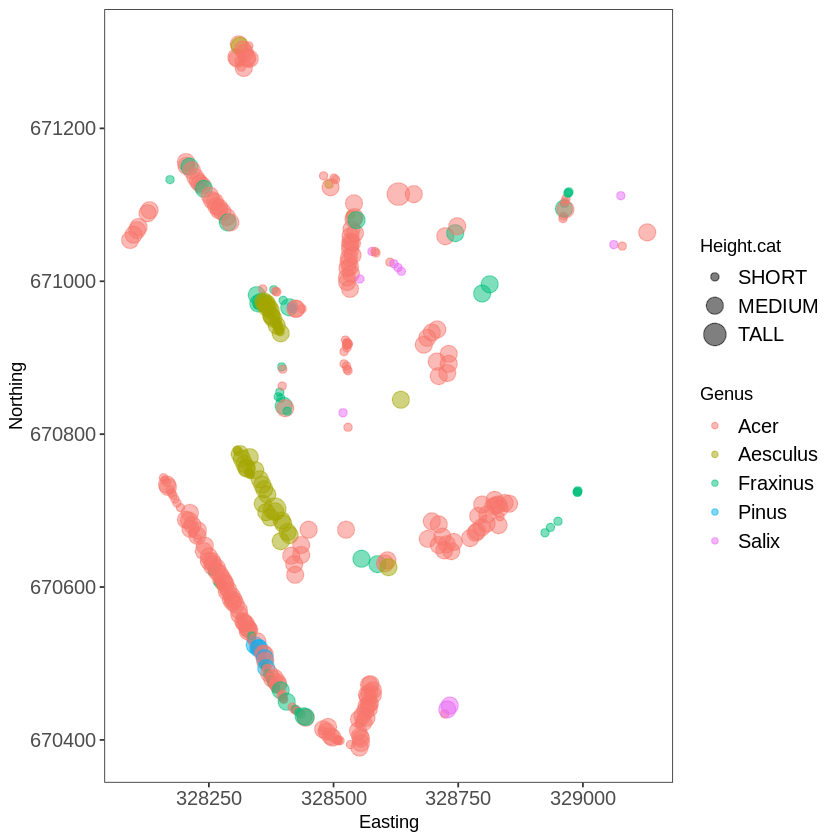

In [34]:
# Subconjunto de quadro de dados para menos gêneros

trees.five <- trees.genus %>%
               filter(Genus %in% c("Acer", "Fraxinus", "Salix", "Aesculus", "Pinus"))

# Mapeie todas as árvores

(map.all <- ggplot(trees.five) +
            geom_point(aes(x = Easting, y = Northing, size = Height.cat, colour = Genus), alpha = 0.5) +
            theme_bw() +
            theme(panel.grid = element_blank(),
                  axis.text = element_text(size = 12),
                  legend.text = element_text(size = 12)))

Agora, digamos que queremos salvar um mapa separado para cada gênero (portanto, 5 mapas no total). Você poderia filtrar o quadro de dados cinco vezes para cada gênero individual e copiar e colar o código de plotagem cinco vezes também, mas imagine que mantivemos todos os 17 gêneros! É aqui que os pipes vêm em socorro novamente.

Warning message:
“Using size for a discrete variable is not advised.”
Warning message:
“Using size for a discrete variable is not advised.”


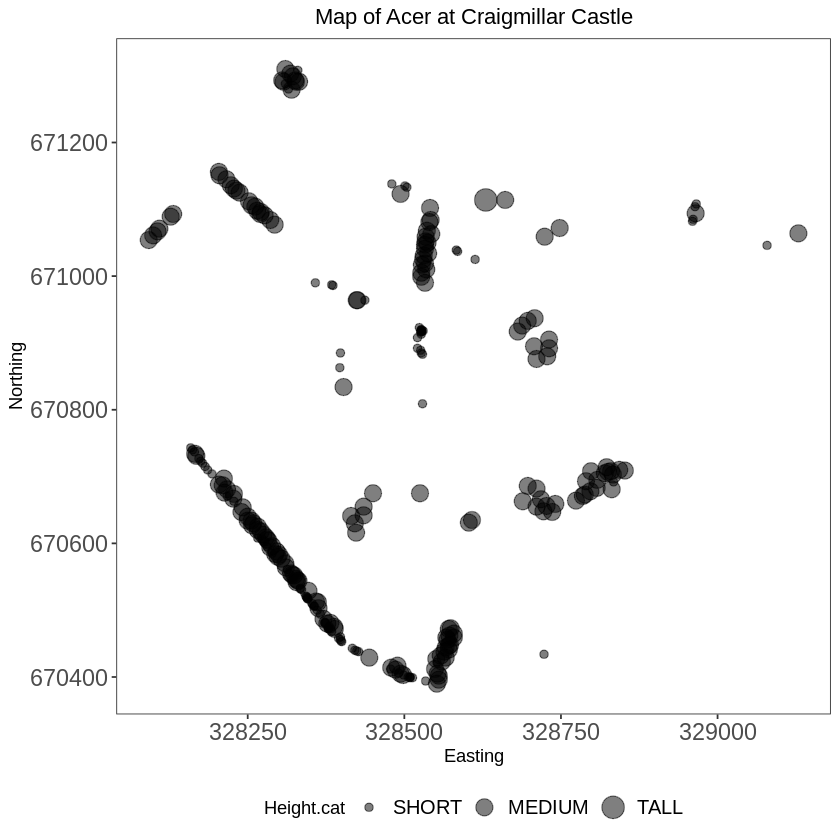

Warning message:
“Using size for a discrete variable is not advised.”


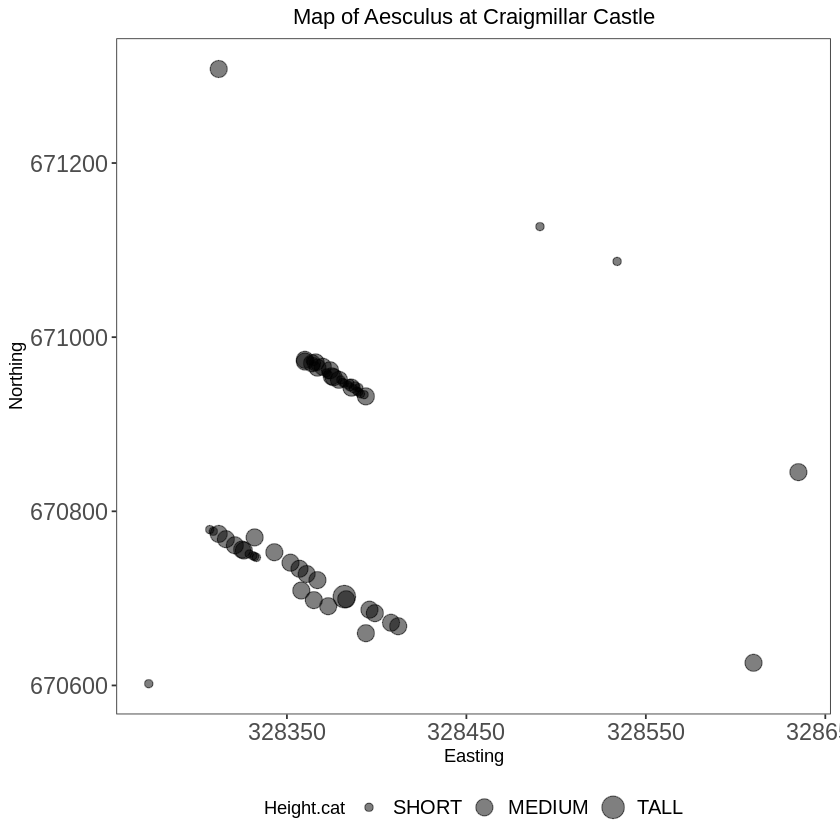

Warning message:
“Using size for a discrete variable is not advised.”


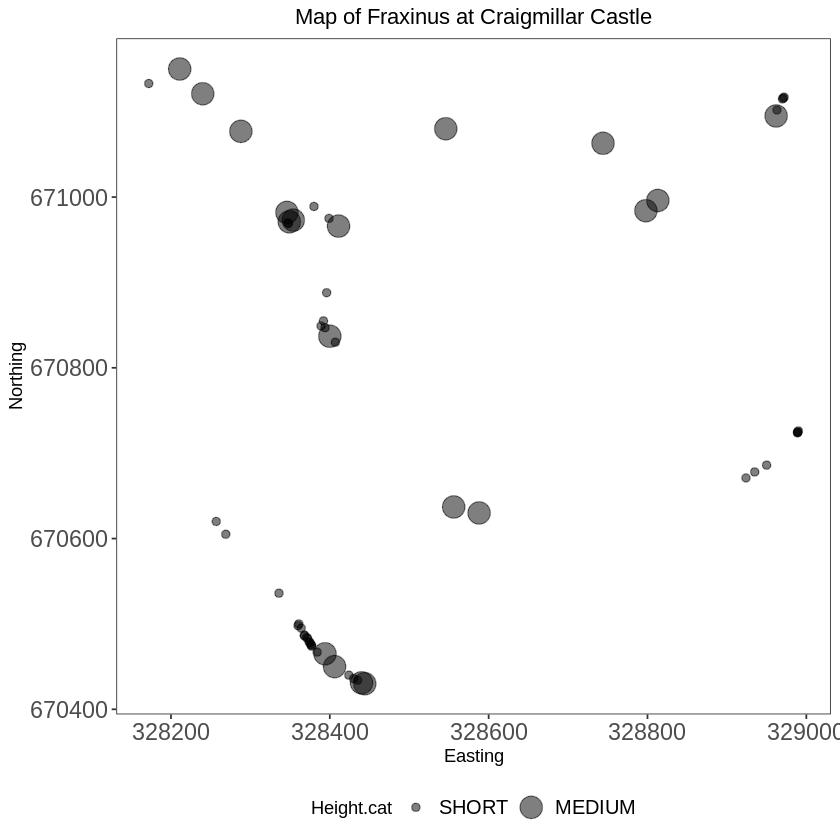

Warning message:
“Using size for a discrete variable is not advised.”


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


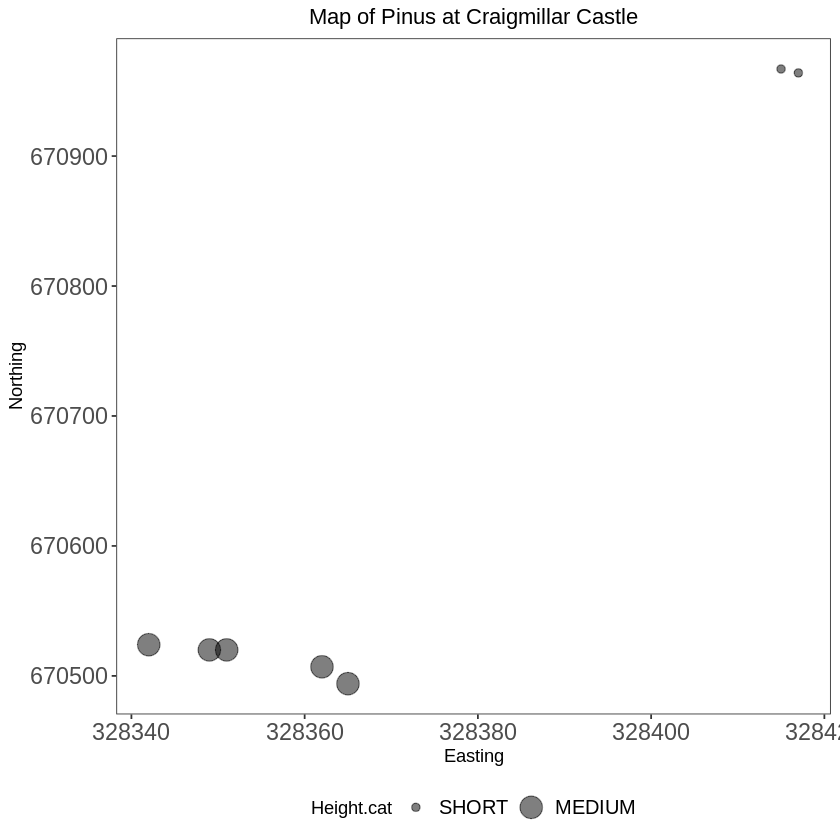

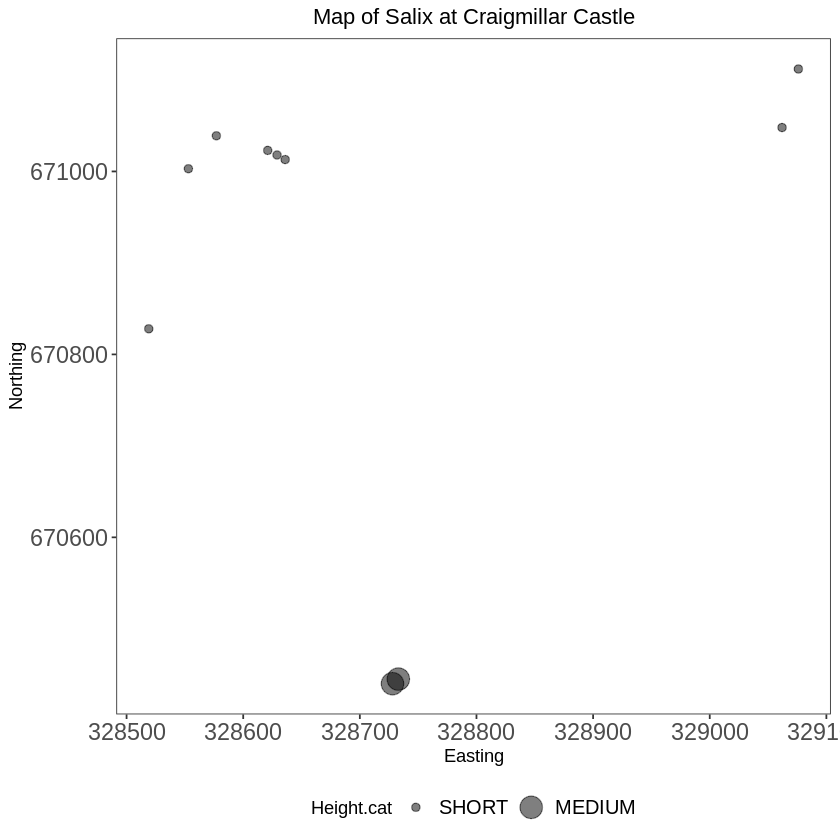

In [36]:
# Traçando um mapa para cada gênero

tree.plots <-
   trees.five  %>%      # O quadro de dados
   group_by(Genus) %>%  # Agrupamento por gênero
   do(plots =           # A chamada de plotagem dentro da função
         ggplot(data = .) +
         geom_point(aes(x = Easting, y = Northing, size = Height.cat), alpha = 0.5) +
         labs(title = paste("Map of", .$Genus, "at Craigmillar Castle", sep = " ")) +
         theme_bw() +
         theme(panel.grid = element_blank(),
               axis.text = element_text(size = 14),
               legend.text = element_text(size = 12),
               plot.title = element_text(hjust = 0.5),
               legend.position = "bottom")
   )

# Você pode visualizar os gráficos antes de salvá-los
tree.plots$plots


# Caso queira salvar as imagens:

# tree.plots %>%
#   do(.,
 #     ggsave(.$plots, filename = paste(getwd(), "/", "map-", .$Genus, ".png", sep = ""), device = "png", height = 12, width = 16, units = "cm"))